# Linear regression - Property Price Prediction 

### Use regression analysis to predict the price of a propert

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('HousePrices.csv')

In [3]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(2073, 81)

In [5]:
df.drop(columns = ['Id'], axis = 1, inplace = True)

In [6]:
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.Alley.isnull().sum()

1944

In [8]:
df.PoolQC.isnull().sum()

2065

In [9]:
df.Fence.isnull().sum()

1669

In [10]:
df.MiscFeature.isnull().sum()

1993

In [11]:
df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis = 1, inplace = True)

In [12]:
df1 = pd.concat([df.Property_Sale_Price, df.drop(columns='Property_Sale_Price', axis = 1)], axis = 1 )
df1.head()

,Property_Sale_Price,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,181500,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,223500,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,140000,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,250000,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [13]:
# we will remove the independent features with correlation less than 0.05 to the dependent variable.

In [14]:
df.corr()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.075636,-0.033609,0.046278,0.033023,0.027194,0.042864,-0.004832,-0.034072,-0.025699,...,0.004620,0.002153,-0.006529,-0.011966,-0.012021,0.001625,-0.003942,-0.020589,0.018891,-0.017399
LotFrontage,-0.075636,1.000000,0.311156,0.108095,-0.011213,0.092680,0.101034,0.129620,0.139424,0.062472,...,0.082081,0.106846,-0.002309,0.042993,0.021500,0.124087,-0.005094,0.025110,0.025584,0.279836
LotArea,-0.033609,0.311156,1.000000,0.078232,0.014209,-0.010551,0.017766,0.064370,0.164989,0.075875,...,0.121530,0.064376,-0.023199,0.010594,0.035370,0.062458,0.030949,-0.001707,-0.006478,0.211572
OverallQual,0.046278,0.108095,0.078232,1.000000,-0.010092,0.335326,0.379579,0.283981,0.163501,-0.058146,...,0.155307,0.217044,-0.080219,0.000451,0.021561,0.045138,-0.034206,0.033685,-0.021130,0.523553
OverallCond,0.033023,-0.011213,0.014209,-0.010092,1.000000,-0.245303,0.084102,-0.083282,-0.035849,0.027023,...,0.013854,-0.042208,0.044501,0.017358,0.012021,-0.016993,0.041833,-0.025281,0.035050,-0.049926
YearBuilt,0.027194,0.092680,-0.010551,0.335326,-0.245303,1.000000,0.536129,0.263968,0.207941,-0.027220,...,0.180472,0.179935,-0.322195,0.034056,-0.049156,0.005788,-0.038620,0.027765,-0.006211,0.437662
YearRemodAdd,0.042864,0.101034,0.017766,0.379579,0.084102,0.536129,1.000000,0.166549,0.101401,-0.073927,...,0.182932,0.221604,-0.177739,0.039945,-0.036832,-0.009607,-0.011749,0.033514,0.058932,0.475565
MasVnrArea,-0.004832,0.129620,0.064370,0.283981,-0.083282,0.263968,0.166549,1.000000,0.238535,-0.079737,...,0.123340,0.141377,-0.097651,0.029774,0.063607,0.002936,-0.035352,-0.017798,0.020028,0.482038
BsmtFinSF1,-0.034072,0.139424,0.164989,0.163501,-0.035849,0.207941,0.101401,0.238535,1.000000,-0.060739,...,0.207229,0.107593,-0.089326,0.045092,0.046826,0.099504,-0.001520,-0.019242,0.030208,0.373276
BsmtFinSF2,-0.025699,0.062472,0.075875,-0.058146,0.027023,-0.027220,-0.073927,-0.079737,-0.060739,1.000000,...,0.073748,-0.001699,0.058107,-0.030341,0.099569,0.027055,-0.002205,-0.016562,0.025510,-0.029042


These columns have very less correlation with the dependent feature.

Dwell_Type	-0.017399	
OverallCond	-0.049926
BsmtFinSF2	-0.029042
LowQualFinSF	-0.046975
BsmtHalfBath	-0.026010
MiscVal	-0.020430	
MoSold	0.041053
YrSold	0.001740
KitchenAbvGr	0.006330
EnclosedPorch	-0.002113	
3SsnPorch	0.037639	
ScreenPorch	0.019810	

In [15]:
df.drop(columns=['Dwell_Type', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'MiscVal', 'MoSold', 'YrSold'], axis = 1, inplace = True)

In [16]:
df.drop(columns=['KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True)

In [17]:
df.drop(columns='ExterCond', axis = 1, inplace = True)

In [18]:
df.drop(columns='GarageCars', axis = 1, inplace=True)
# The correlation between GarageCars and GarageArea is 0.88, multicolinearity. So anyone of the feature is enough to predict the price

In [19]:
df.shape

(2073, 61)

In [20]:
for col in df.columns:
    print(col,"\t",df[col].dtype,'\t',df[col].isnull().sum())

Zone_Class 	 object 	 0
LotFrontage 	 float64 	 320
LotArea 	 int64 	 0
Road_Type 	 object 	 0
Property_Shape 	 object 	 0
LandContour 	 object 	 0
Utilities 	 object 	 0
LotConfig 	 object 	 0
LandSlope 	 object 	 0
Neighborhood 	 object 	 0
Condition1 	 object 	 0
Condition2 	 object 	 0
Dwelling_Type 	 object 	 0
HouseStyle 	 object 	 0
OverallQual 	 int64 	 0
YearBuilt 	 int64 	 0
YearRemodAdd 	 int64 	 0
RoofStyle 	 object 	 0
RoofMatl 	 object 	 0
Exterior1st 	 object 	 0
Exterior2nd 	 object 	 0
MasVnrType 	 object 	 14
MasVnrArea 	 float64 	 14
ExterQual 	 object 	 0
Foundation 	 object 	 0
BsmtQual 	 object 	 59
BsmtCond 	 object 	 59
BsmtExposure 	 object 	 61
BsmtFinType1 	 object 	 59
BsmtFinSF1 	 int64 	 0
BsmtFinType2 	 object 	 60
BsmtUnfSF 	 int64 	 0
TotalBsmtSF 	 int64 	 0
Heating 	 object 	 0
HeatingQC 	 object 	 0
CentralAir 	 object 	 0
Electrical 	 object 	 1
1stFlrSF 	 int64 	 0
2ndFlrSF 	 int64 	 0
GrLivArea 	 int64 	 0
BsmtFullBath 	 int64 	 0
FullBath 	 int64 

In [21]:
df.shape

(2073, 61)

### Filling missing values

In [22]:

col = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for name in col:
    df[name].fillna(df[name].mean(), inplace = True)

In [23]:
for name in col:
    print(df[name].isnull().sum())

0
0
0


In [24]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode, inplace = True)

In [25]:
for col in df.columns:
    if df[col].dtype =='object':
        print(df[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [26]:
# Thus we have handled the missing values by
#1) Replacing with mean for int datatype features
#2) Replacing with mode for object datatype features

In [27]:
df.describe(include = 'object')

,Zone_Class,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,...,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073
unique,5,2,4,4,2,5,3,25,9,8,...,6,4,7,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1611,2063,1300,1854,2070,1481,1958,317,1794,2054,...,1901,1043,1937,1252,857,1870,1885,1913,1797,1695


In [28]:
df.Road_Type.value_counts()

Pave    2063
Grvl      10
Name: Road_Type, dtype: int64

In [29]:
# Only 10 values are Grvl out of 2073 rows. 
# Droping this feature will be a wise idea
df.drop(columns ='Road_Type', axis = 1, inplace = True)

In [30]:
df.Utilities.value_counts()

AllPub    2070
NoSeWa       3
Name: Utilities, dtype: int64

In [31]:
# Only 3 values are NoSeWa l out of 2073 rows. 
# Droping this feature will be a wise idea
df.drop(columns ='Utilities', axis = 1, inplace = True)

In [32]:
# Similarly condition2 , It cannot give any insight. 
df.drop(columns ='Condition2', axis = 1, inplace = True)

In [33]:
# We can group/merge the values in certain features together to simplify the model
df.Zone_Class.value_counts()

RL         1611
RM          324
FV          102
RH           22
C (all)      14
Name: Zone_Class, dtype: int64

In [34]:
df.Zone_Class.replace('C','NR', inplace = True) # NR - Non residential
df.Zone_Class.replace('C (all)','NR', inplace = True)

In [35]:
# unable to group neigbourhood, so I decide to drop it. 
df.drop(columns= 'Neighborhood', axis = 1, inplace= True)

In [36]:
df.Condition1.replace(['RRAn','RRNn'],'NrRR', inplace = True) #NrRR - near rail road
df.Condition1.replace('PosA','PosN', inplace = True) 
df.Condition1.replace('RRAe','RRNe', inplace = True) 

In [37]:
df.Dwelling_Type.replace(['TwnhsE','TwnhsI'],'Twnhs', inplace = True)

In [38]:
df.HouseStyle.value_counts()

1Story    1036
2Story     638
1.5Fin     214
SLvl        89
SFoyer      54
2.5Unf      16
1.5Unf      16
2.5Fin      10
Name: HouseStyle, dtype: int64

In [39]:
df.HouseStyle.replace(['1Story','1.5Fin', '1.5Unf'], 'lessThan2', inplace = True)
df.HouseStyle.replace(['2Story','2.5Fin', '2.5Unf'], 'greaterThanEq2', inplace=True)

In [40]:
df.drop(columns=['Exterior1st', 'Exterior2nd'], axis = 1, inplace = True)

In [41]:
df.ExterQual.replace(['Ex','Gd','TA', 'Fa', 'Po'], [5,4,3,2,1], inplace = True )

In [42]:
df.BsmtQual.replace(['Ex','Gd','TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace = True)

In [43]:
df.BsmtCond.replace(['Ex','Gd','TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace = True)

In [44]:
df.BsmtExposure.replace(['Ex','Av','Mn', 'No', 'Na'], [4,3,2,1,0], inplace = True)

In [45]:
df.HeatingQC.replace(['Ex','Gd','TA', 'Fa', 'Po'], [5,4,3,2,1], inplace = True)

In [46]:
df = pd.get_dummies( data = df,columns=['CentralAir'], drop_first= True)

In [47]:
df.KitchenQual.replace(['Ex','Gd','TA', 'Fa', 'Po'], [5,4,3,2,1], inplace = True)

In [48]:
df.drop(columns='Functional', axis = 1, inplace = True)

In [49]:
df.Fireplaces.replace(['Ex','Gd','TA', 'Fa', 'Po','NA'], [5,4,3,2,1,0], inplace = True)

In [50]:
df.GarageQual.replace(['Ex','Gd','TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace = True)

In [51]:
df.GarageCond.replace(['Ex','Gd','TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace = True)

<AxesSubplot:>

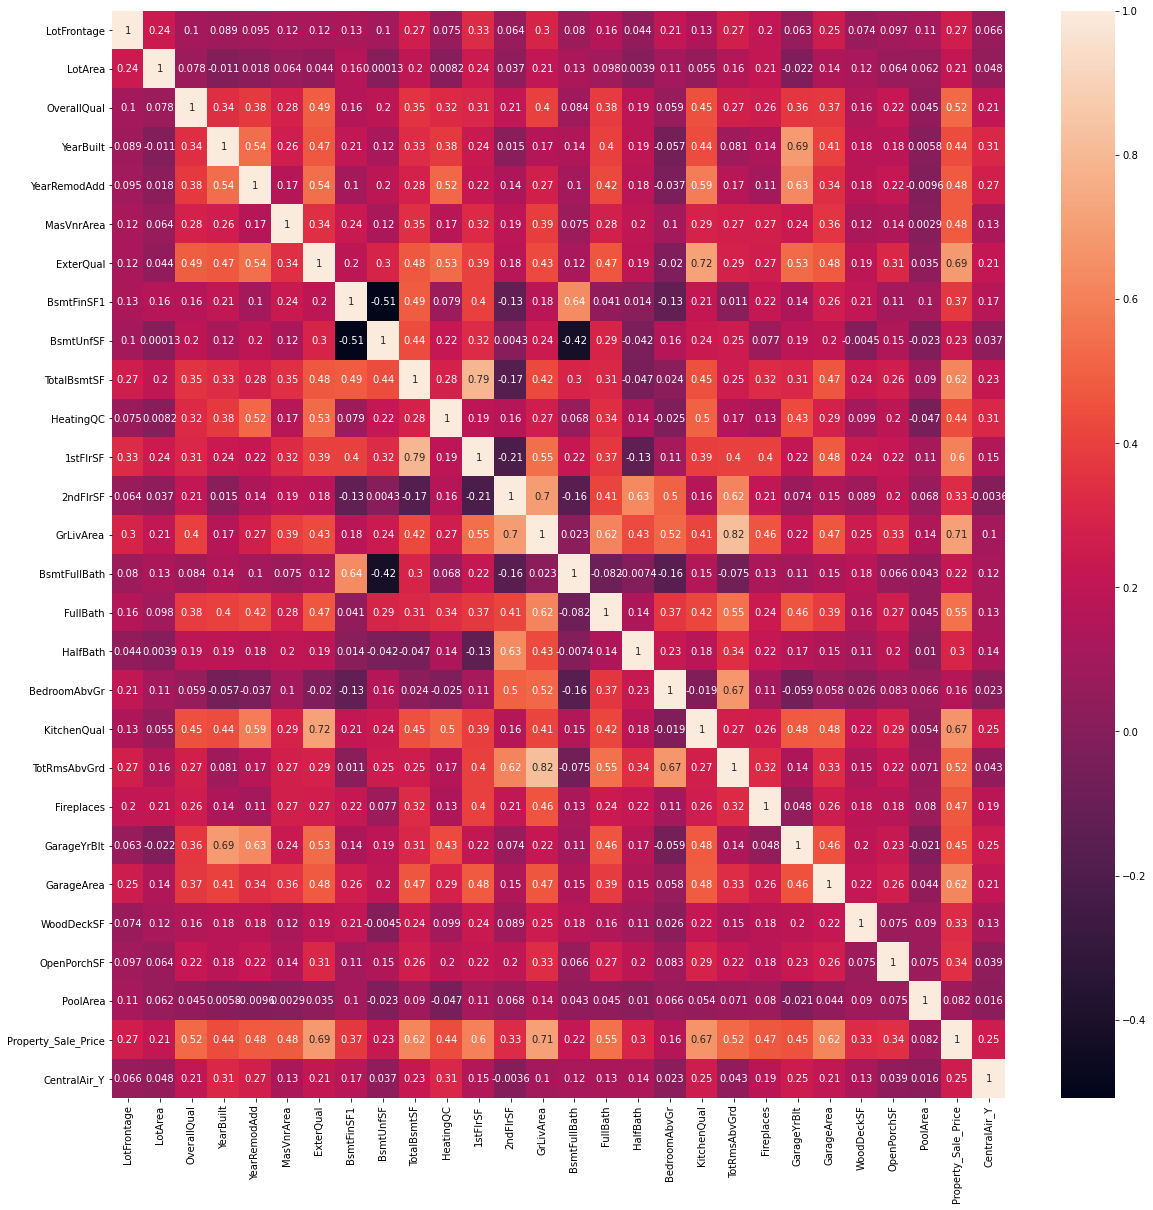

In [52]:
#Finding correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [53]:
df.drop(columns='PoolArea', axis=1, inplace=True)

In [54]:
cat = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)

In [55]:
cat

['Zone_Class',
 'Property_Shape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [56]:
df = pd.get_dummies(data =df, columns=['Zone_Class',
 'Property_Shape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtCond'])

In [57]:
df = pd.get_dummies(data =df, columns=['BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',])

In [58]:
df = pd.get_dummies(data =df, columns=[ 'Heating',
 'Electrical'] )

In [59]:
df = pd.get_dummies(data =df, columns=['SaleCondition'] )

In [60]:
df = pd.get_dummies(data =df, columns=['SaleType'] )

In [61]:
df = pd.get_dummies(data =df, columns=['PavedDrive'] )

In [62]:
for col in df.columns:
    if ((df[col].dtype == 'object')):
        print(col)

GarageType
GarageFinish
GarageQual
GarageCond


In [63]:
df.drop(columns=['GarageType',
'GarageFinish',
'GarageQual',
'GarageCond'], axis = 1, inplace=True)

<AxesSubplot:>

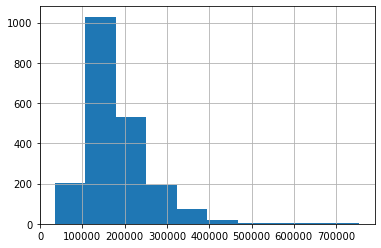

In [64]:
df.Property_Sale_Price.hist()

<AxesSubplot:>

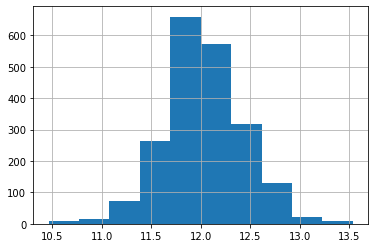

In [65]:
price_log = np.log(df.Property_Sale_Price)
price_log.hist()

#### Log(Price) is normally distributed - bell curve
#### It is better to use log(price) 

In [66]:
df['log_price']=np.log(df["Property_Sale_Price"])

In [67]:
df

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_N,PavedDrive_P,PavedDrive_Y,log_price
0,65.000000,8450,7,2003,2003,196.0,4,706,150,856,...,0,0,0,0,0,1,0,0,1,12.247694
1,80.000000,9600,6,1976,1976,0.0,3,978,284,1262,...,0,0,0,0,0,1,0,0,1,12.109011
2,68.000000,11250,7,2001,2002,162.0,4,486,434,920,...,0,0,0,0,0,1,0,0,1,12.317167
3,60.000000,9550,7,1915,1970,0.0,3,216,540,756,...,0,0,0,0,0,1,0,0,1,11.849398
4,84.000000,14260,8,2000,2000,350.0,4,655,490,1145,...,0,0,0,0,0,1,0,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,72.056475,8755,8,1936,1999,298.0,4,772,220,992,...,0,0,0,0,0,1,0,0,1,12.273731
2069,63.000000,7711,6,1936,1977,0.0,3,1440,0,1440,...,0,0,0,0,1,0,1,0,0,11.918391
2070,313.000000,25000,4,1983,1996,0.0,3,0,1632,1632,...,0,0,0,0,0,1,0,1,0,11.870600
2071,52.000000,14375,9,1958,1958,541.0,3,111,354,819,...,0,0,0,0,0,0,0,0,1,11.831379


### Modeling

In [68]:

df_exp = df.drop(columns='Property_Sale_Price')
x=df_exp.drop(columns =["log_price"],axis=1)
y=df_exp[["log_price"]]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=2)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.9007129186185796
0.8878171069369069


### Score Improvement


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df_exp.drop(["log_price"], axis = 1)
X = scaler.fit_transform(x)
Y = df_exp[['log_price']]
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.8993724009220517
-1.0514183767512052e+21


MinMax Scaler is not useful here. 
We can try standard Scaler

In [70]:
# Standardization
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

model.fit(x_train, y_train)  
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

0.8993028391672713
-1.1024905444699872e+23


As we can see Standardization also isnt helpful.

# Result

Train Score = 0.9007129186185796
Test Score = 0.8878171069369069